---
title: 'STATS 202 Homework 4'
---

In [1]:
from ISLP import load_data
from ISLP.bart import BART
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import pandas as pd
from IPython.display import Markdown
import numpy as np
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
)

sns.set_theme()

# Problem 1
## Problem 1.a

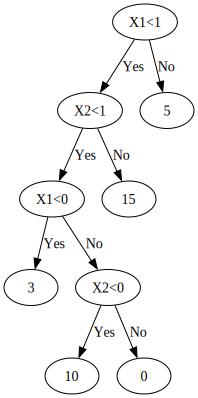

In [2]:
dot = graphviz.Digraph()
dot.edge("X1<1", "X2<1", label="Yes")
dot.edge("X1<1", "5", label="No")
dot.edge("X2<1", "X1<0", label="Yes")
dot.edge("X2<1", "15", label="No")
dot.edge("X1<0", "3", label="Yes")
dot.edge("X1<0", "X2<0", label="No")
dot.edge("X2<0", "10", label="Yes")
dot.edge("X2<0", "0", label="No")
dot

## Problem 1.b

In [3]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 2)
ax.set_ylim(0, 3)
ax.set_xlabel(r"$X_1$")
ax.set_ylabel(r"$X_2$")
plt.plot([-1, 2], [1, 1], color="C7")
plt.plot([1, 1], [0, 1], color="C7")
plt.text(0, 0.5, "-1.8", horizontalalignment="center", verticalalignment="center")
plt.text(1.5, 0.5, "0.63", horizontalalignment="center", verticalalignment="center")
plt.plot([-1, 2], [2, 2], color="C7")
plt.text(0.5, 1.5, "2.49", horizontalalignment="center", verticalalignment="center")
plt.plot([0, 0], [2, 3], color="C7")
plt.text(-0.5, 2.5, "-1.06", horizontalalignment="center", verticalalignment="center")
plt.text(1, 2.5, "0.21", horizontalalignment="center", verticalalignment="center")

plt.show()
sns.set_theme()

<Figure size 3000x3000 with 1 Axes>

# Problem 2
## Problem 2.a

In [4]:
Carseats = load_data("Carseats")
Carseats = pd.get_dummies(Carseats)
X_train, X_test, Y_train, Y_test = train_test_split(
    Carseats.drop("Sales", axis=1), Carseats.Sales, random_state=42
)

## Problem 2.b

In [5]:
tree = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X_train, Y_train)
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X_train.columns.to_list())
plt.show()

<Figure size 3000x3000 with 1 Axes>

From this tree, we can say that ShelveLoc_Good increases the sales, and a lower price increases sales. That price cut is different for a ShelveLoc_Good ( 135 ) and not ShelveLoc_Good ( 105.5 ).

In [6]:
Markdown("Test MSE is " + str(mean_squared_error(tree.predict(X_test), Y_test)))

Test MSE is 5.134349412309639

## Problem 2.c

In [7]:
grid_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    {
        "ccp_alpha": DecisionTreeRegressor(random_state=42)
        .cost_complexity_pruning_path(X_train, Y_train)
        .ccp_alphas,
        "max_depth": np.arange(1, 10),
    },
).fit(X_train, Y_train)
plt.figure(figsize=(10, 10))
plot_tree(grid_tree.best_estimator_, feature_names=X_train.columns.to_list())
plt.show()
grid_tree.best_estimator_

<Figure size 3000x3000 with 1 Axes>

DecisionTreeRegressor(ccp_alpha=0.043897986419752094, max_depth=7,
                      random_state=42)

In [8]:
Markdown(
    "The test MSE is " + str(mean_squared_error(grid_tree.predict(X_test), Y_test))
)

The test MSE is 4.692148902800738

Yes, using CV to test pruning and max depths does improve testing score.
## Problem 2.d

In [9]:
bag = BaggingRegressor(random_state=42).fit(X_train, Y_train)
Markdown("The test MSE is " + str(mean_squared_error(bag.predict(X_test), Y_test)))

The test MSE is 3.0381167200000005

In [10]:
sns.barplot(
    data=pd.concat(
        [
            pd.DataFrame([tree.feature_importances_], columns=X_train.columns)
            for tree in bag.estimators_
        ]
    )
)
plt.xticks(rotation=90)
plt.show()

<Figure size 1650x1050 with 1 Axes>

We can see that Price is by far most important, shortly followed by ShevleLoc_Good and Age.
## Problem 2.e

In [11]:
forest = RandomForestRegressor(random_state=42).fit(X_train, Y_train)
Markdown("The test MSE is " + str(mean_squared_error(forest.predict(X_test), Y_test)))

The test MSE is 2.7944533162999994

In [12]:
sns.barplot(
    data=pd.concat(
        [
            pd.DataFrame([tree.feature_importances_], columns=X_train.columns)
            for tree in forest.estimators_
        ]
    )
)
plt.xticks(rotation=90)
plt.show()

<Figure size 1650x1050 with 1 Axes>

The importance of variables is almost identical, with Price as the most important shortly followed by ShelveLoc_Good and Age.

In [13]:
sns.lineplot(
    x=np.arange(1, 15),
    y=[
        mean_squared_error(
            RandomForestRegressor(max_features=max_features, random_state=42)
            .fit(X_train, Y_train)
            .predict(X_test),
            Y_test,
        )
        for max_features in np.arange(1, 15)
    ],
)
plt.plot()

[]

<Figure size 1650x1050 with 1 Axes>

The error rate generally increases with $m$, except for a spike at $m=8$ and a dip and $m=9,10$.
## Problem 2.f

In [14]:
b = BART(random_state=42).fit(np.asarray(X_train), np.asarray(Y_train))
Markdown(
    "The MSE is "
    + str(mean_squared_error(b.predict(np.asarray(X_test)), np.asarray(Y_test)))
)

The MSE is 1.2613876733106402

This is the best MSE so far!
# Problem 3
## Problem 3.a

In [15]:
Hitters = load_data("Hitters")
Hitters = Hitters.dropna()
Hitters.Salary = np.log(Hitters.Salary)
Hitters = pd.get_dummies(Hitters)

## Problem 3.b

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    Hitters.drop("Salary", axis=1), Hitters.Salary, train_size=200
)

## Problem 3.c

In [17]:
lambdas = np.linspace(0, 1, 100)
sns.lineplot(
    x=lambdas,
    y=[
        mean_squared_error(
            GradientBoostingRegressor(
                learning_rate=learning_rate, n_estimators=1000, random_state=42
            )
            .fit(X_train, Y_train)
            .predict(X_train),
            Y_train,
        )
        for learning_rate in lambdas
    ],
)
plt.plot()

[]

<Figure size 1650x1050 with 1 Axes>

## Problem 3.d

In [18]:
lambdas = np.linspace(0, 1, 100)
sns.lineplot(
    x=lambdas,
    y=[
        mean_squared_error(
            GradientBoostingRegressor(
                learning_rate=learning_rate, n_estimators=1000, random_state=42
            )
            .fit(X_train, Y_train)
            .predict(X_test),
            Y_test,
        )
        for learning_rate in lambdas
    ],
)
plt.plot()

[]

<Figure size 1650x1050 with 1 Axes>

## Problem 3.e

In [19]:
gradient_boosting_MSE = mean_squared_error(
    GradientBoostingRegressor(random_state=42).fit(X_train, Y_train).predict(X_test),
    Y_test,
)
linear_MSE = mean_squared_error(
    LinearRegression().fit(X_train, Y_train).predict(X_test),
    Y_test,
)
ridge_MSE = mean_squared_error(
    Ridge(random_state=42).fit(X_train, Y_train).predict(X_test),
    Y_test,
)
Markdown(
    "The gradient boosting MSE is "
    + str(gradient_boosting_MSE)
    + ", the linear MSE is "
    + str(linear_MSE)
    + ", and the ridge MSE is "
    + str(ridge_MSE)
)

The gradient boosting MSE is 0.16706774942214167, the linear MSE is 0.333406117931281, and the ridge MSE is 0.3333759874646542

We can see that the gradient boosting MSE is much much better tha nthe linear or ridge MSE.
## Problem 3.f

In [20]:
boost = GradientBoostingRegressor(random_state=42).fit(X_train, Y_train)
sns.barplot(
    data=pd.concat(
        [
            pd.DataFrame([tree[0].feature_importances_], columns=X_train.columns)
            for tree in boost.estimators_
        ]
    )
)
plt.xticks(rotation=90)
plt.show()

<Figure size 1650x1050 with 1 Axes>

The most important predictor seems to be CAtBat, however RBI, Years, and CHmRun are within one standard deviation.
## Problem 3.g

In [21]:
Markdown(
    "Test MSE is "
    + str(
        mean_squared_error(
            BaggingRegressor(random_state=42).fit(X_train, Y_train).predict(X_test),
            Y_test,
        )
    )
)

Test MSE is 0.17820166722265232

# Problem 4

$$
-\sum_{i=1}^n\sum_{m=0}^9 y_{im} \log(f_m(x_i))
$$
$$
\begin{split}
-\log\left(\prod_{i:y_i=1} p(x_i)\prod_{i':y_{i'}=0}(1-p(x_{i'}))\right)&=-\log\left(\prod_{i:y_i=1} p(x_i)\right)-\log\left(\prod_{i':y_{i'}=0}(1-p(x_{i'}))\right)
\end{split}
$$

# Problem 5
$$
\begin{split}
\tanh(a)&=\frac{e^a-e^{-a}}{e^a+e^{-a}} \\
&=1+\frac{e^a-e^{-a}-e^a-e^{-a}}{e^a+e^{-a}} \\
&=1-2\frac{e^{-a}}{e^a+e^{-a}} \\
&=1-2\frac{1}{e^{2a}+1} \\
&=1-2\sigma(-2a) \\
\end{split}
$$
$$
\begin{split}
\sigma(a)=\frac{1}{2}-\frac{1}{2}\tanh(-\frac{1}{2}a)
\end{split}
$$
Working our way backwards, let's looks at $a_k^{(2s)}$
$$
\begin{split}
a_k^{(2s)}&=w_{k0}^{(2s)}+\sum_{j=1}^M w_{kj}^{(2s)}\sigma\left(a_j^{(1s)}\right) \\
&=w_{k0}^{(2s)}+\sum_{j=1}^M w_{kj}^{(2s)}\left(\frac{1}{2}-\frac{1}{2}\tanh\left(-\frac{1}{2}a_j^{(1s)}\right)\right) \\
&=w_{k0}^{(2s)}+\frac{1}{2}\sum_{j=1}^M w_{kj}^{(2s)}+\sum_{j=1}^M -\frac{1}{2}w_{kj}^{(2s)}\tanh\left(-\frac{1}{2}a_j^{(1s)}\right)
\end{split}
$$
Now let's say that $w_{k0}^{(2t)}=w_{k0}^{(2s)}+\frac{1}{2}\sum_{j=1}^M w_{kj}^{(2s)}$, $w_{kj}^{(2t)}=-\frac{1}{2}w_{kj}^{(2s)}$, and $a_j^{(1t)}=-\frac{1}{2}a_j^{(1s)}$ then
$$
\begin{split}
a_k^{(2s)}&=w_{k0}^{(2s)}+\frac{1}{2}\sum_{j=1}^M w_{kj}^{(2s)}+\sum_{j=1}^M -\frac{1}{2}w_{kj}^{(2s)}\tanh\left(-\frac{1}{2}a_j^{(1s)}\right) \\
&=w_{k0}^{(2t)}+\sum_{j=1}^M w_{kj}^{(2t)}\tanh\left(a_j^{(1t)}\right)
\end{split}
$$
Now we need to show $w^{(1t)}$ such that $a_j^{(1t)}=-\frac{1}{2}a_j^{(1s)}$.
$$
\begin{split}
-\frac{1}{2}a_j^{(1s)}&=-\frac{1}{2}\left(w_{j0}^{(1s)}+\sum_{i=1}^p w_{ji}^{(1s)}x_i\right) \\
&=-\frac{1}{2}w_{j0}^{(1s)}+\sum_{i=1}^p -\frac{1}{2}w_{ji}^{(1s)}x_i
\end{split}
$$
If we have $w_{j0}^{(1t)}=-\frac{1}{2}w_{j0}^{(1s)}$ and $w_{ji}^{(1t)}=-\frac{1}{2}w_{ji}^{(1s)}$ then
$$
\begin{split}
-\frac{1}{2}a_j^{(1s)}&=-\frac{1}{2}w_{j0}^{(1s)}+\sum_{i=1}^p -\frac{1}{2}w_{ji}^{(1s)}x_i \\
&=w_{j0}^{(1t)}+\sum_{i=1}^p w_{ji}^{(1t)}x_i \\
&=a_j^{(1t)}
\end{split}
$$
Therefore, we have $a_k^{(2t)}=a_k^{(2t)}$ if
$$
\begin{split}
w_{k0}^{(2t)}&=w_{k0}^{(2s)}+\frac{1}{2}\sum_{j=1}^M w_{kj}^{(2s)} \\
w_{kj}^{(2t)}&=-\frac{1}{2}w_{kj}^{(2s)} \\
w_{j0}^{(1t)}&=-\frac{1}{2}w_{j0}^{(1s)} \\
w_{ji}^{(1t)}&=-\frac{1}{2}w_{ji}^{(1s)}
\end{split}
$$